<center>
    <h1> 
Climate Change Data Analysis 
        </h1>
</center>

---

<center>
    By Vishal Wagadre
</center>

This initiative offers an extensive, multi-faceted dataset monitoring crucial climate change indicators on a worldwide scale. It encompasses time series data on changes in surface temperature, rising sea levels, atmospheric CO₂ levels, land cover statistics, forest and carbon reserves, as well as the occurrence of climate-related disasters. The information is obtained from renowned organizations like FAO and NOAA, and is structured for research or analytical purposes.  

##### Features  
1. Historical annual and monthly data on climate indicators, from the 1960s to 2025.  
2. Global surface temperature anomalies by country and region.  
3. Global and regional sea level rise statistics.  
4. Frequency and impact of climate-related natural disasters.  
5. Forest area, carbon stocks, and indices of land cover and climate regulation.  
6. Atmospheric CO₂ (ppm) monthly trend time series.
---

Link for datasets: https://climatedata.imf.org/pages/climatechange-data  

##### Datasets Used:  
1. Annual_Mean_Global_Surface_Temperature.csv
2. Monthly_Atmospheric_Carbon_Dioxide_concentrations.csv
3. Change_in_mean_sea_level.csv
4. Forest_and_Carbon.csv
5. Land_Cover_Accounts.csv
6. Climate_related_disasters_frequency.csv
---

#### Step 1: Setup and Data Loading

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Loading datasets
temp_df = pd.read_csv('Annual_Mean_Global_Surface_Temperature.csv')
sea_level_df = pd.read_csv('Change_in_mean_sea_level.csv', delimiter=',')
disasters_df = pd.read_csv('Climate_related_disasters_frequency.csv')
forest_df = pd.read_csv('Forest_and_Carbon.csv')
land_cover_df = pd.read_csv('Land_Cover_Accounts.csv')
co2_df = pd.read_csv('Monthly_Atmospheric_Carbon_Dioxide_concentrations.csv')

# Check the first few rows of each dataset to see structure
print("Temperature Data Sample:")
print(temp_df.head())

print("\nSea Level Change Data Sample:")
print(sea_level_df.head())

print("\nClimate Disasters Data Sample:")
print(disasters_df.head())

print("\nForest and Carbon Data Sample:")
print(forest_df.head())

print("\nLand Cover Data Sample:")
print(land_cover_df.head())

print("\nCO2 Concentrations Data Sample:")
print(co2_df.head())

Temperature Data Sample:
   ObjectId                       Country ISO2    ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF     AFG   
1         2                        Africa  NaN  AFRTMP   
2         3                       Albania   AL     ALB   
3         4                       Algeria   DZ     DZA   
4         5                American Samoa   AS     ASM   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS  

---
#### Step 2: Data Cleaning and Preparation  
##### 2.a Climate Temperature Data  
The temperature data is first in wide format, having years represented as columns. We transform it into a long format to create a single 'Year' column paired with related temperature change values, enabling time series analysis. Missing values are analyzed and eliminated for precision.

In [2]:
# Convert years columns to numeric for melting
years = [str(y) for y in range(1961, 2025)]

# Melt the temperature data to long format for time series analysis
temp_long = temp_df.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator'],
                         value_vars=years,
                         var_name='Year', value_name='Temperature_Change')

# Convert Year to integer
temp_long['Year'] = temp_long['Year'].astype(int)

# Check missing data
print("Missing Temperature Data per Year:")
print(temp_long.isnull().sum())

# Drop rows with missing temperature for simplicity
temp_long = temp_long.dropna(subset=['Temperature_Change'])


Missing Temperature Data per Year:
Country                  0
ISO2                   448
ISO3                     0
Indicator                0
Year                     0
Temperature_Change    1517
dtype: int64


##### 2.b Sea Level Data  
The sea level change dataset includes a 'Date' column with the prefix 'D', which we strip and convert into pandas datetime objects; unnecessary columns are removed for clarity.

In [137]:
# Clean and parse date column, stripping leading 'D'
sea_level_df['Date'] = pd.to_datetime(sea_level_df['Date'].str.lstrip('D'), format='%m/%d/%Y')

# Select relevant columns including 'Measure' which contains ocean/sea names
sea_level_df_clean = sea_level_df[['Country', 'Indicator', 'Unit', 'Date', 'Value', 'Measure']].copy()

# Drop rows with missing 'Value'
sea_level_df_clean = sea_level_df_clean.dropna(subset=['Value'])

# Filter for Indian Ocean data
indian_ocean_data = sea_level_df_clean[sea_level_df_clean['Measure'] == 'Indian Ocean']


##### 2.c Climate Related Disasters Frequency  
We convert yearly columns into a long format to analyze frequency and impact of different types of disasters over time, removing missing values and aggregating results by year and disaster type.

In [4]:
# Melt the yearly columns for disasters data (1980 to 2024)
disaster_years = [str(y) for y in range(1980, 2025)]
disasters_long = disasters_df.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit'],
                                   value_vars=disaster_years,
                                   var_name='Year', value_name='Value')

# Remove rows with missing values in 'Value'
disasters_long = disasters_long.dropna(subset=['Value'])

# Convert Year to integer
disasters_long['Year'] = disasters_long['Year'].astype(int)

# Summarize total disasters per year worldwide or by country
disasters_summary = disasters_long.groupby(['Year', 'Indicator']).agg({'Value':'sum'}).reset_index()


##### 2.d Forest and Carbon Data  
Forest and carbon stock data are converted from wide to long format, with the year column cleaned and set as an integer for timeseries use.

In [5]:
# Filter relevant columns to reshape forest data (years F1992-F2022)
forest_years = [f'F{y}' for y in range(1992, 2023)]

# Melt forest data into long format
forest_long = forest_df.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator'],
                             value_vars=forest_years,
                             var_name='Year', value_name='Value')

# Convert Year to numeric (remove 'F' prefix)
forest_long['Year'] = forest_long['Year'].str.strip('F').astype(int)

# Drop missing values
forest_long = forest_long.dropna(subset=['Value'])


##### 2.e Land Cover Data  
land cover data is melted into long format, allowing time series and categorical analyses based on land cover indicator and climate influence.

In [6]:
# Melt land cover data for years F1992-F2022
land_cover_years = [f'F{y}' for y in range(1992, 2023)]

land_cover_long = land_cover_df.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator', 'Climate_Influence'],
                                    value_vars=land_cover_years,
                                    var_name='Year', value_name='Value')

# Convert year string to int
land_cover_long['Year'] = land_cover_long['Year'].str.strip('F').astype(int)

land_cover_long = land_cover_long.dropna(subset=['Value'])


##### 2.f Atmospheric CO2 Data  
The monthly atmospheric CO2 concentration data is date parsed for time series analysis.

In [59]:
# Convert 'Date' to datetime for CO2 dataset
co2_df['Date'] = pd.to_datetime(co2_df['Date'], format='%YM%m')

# Select relevant columns
co2_long = co2_df[['Date', 'Value']].copy()

# Check for missing data
print(co2_long.isnull().sum())


Date     0
Value    0
dtype: int64


---
#### Step 3: Visualizations
##### 1. Global Average Temperature Change Over Time  
Plot of global temperature change over time, showing how the Earth's surface temperature anomaly has changed relative to the baseline 1951-1980.

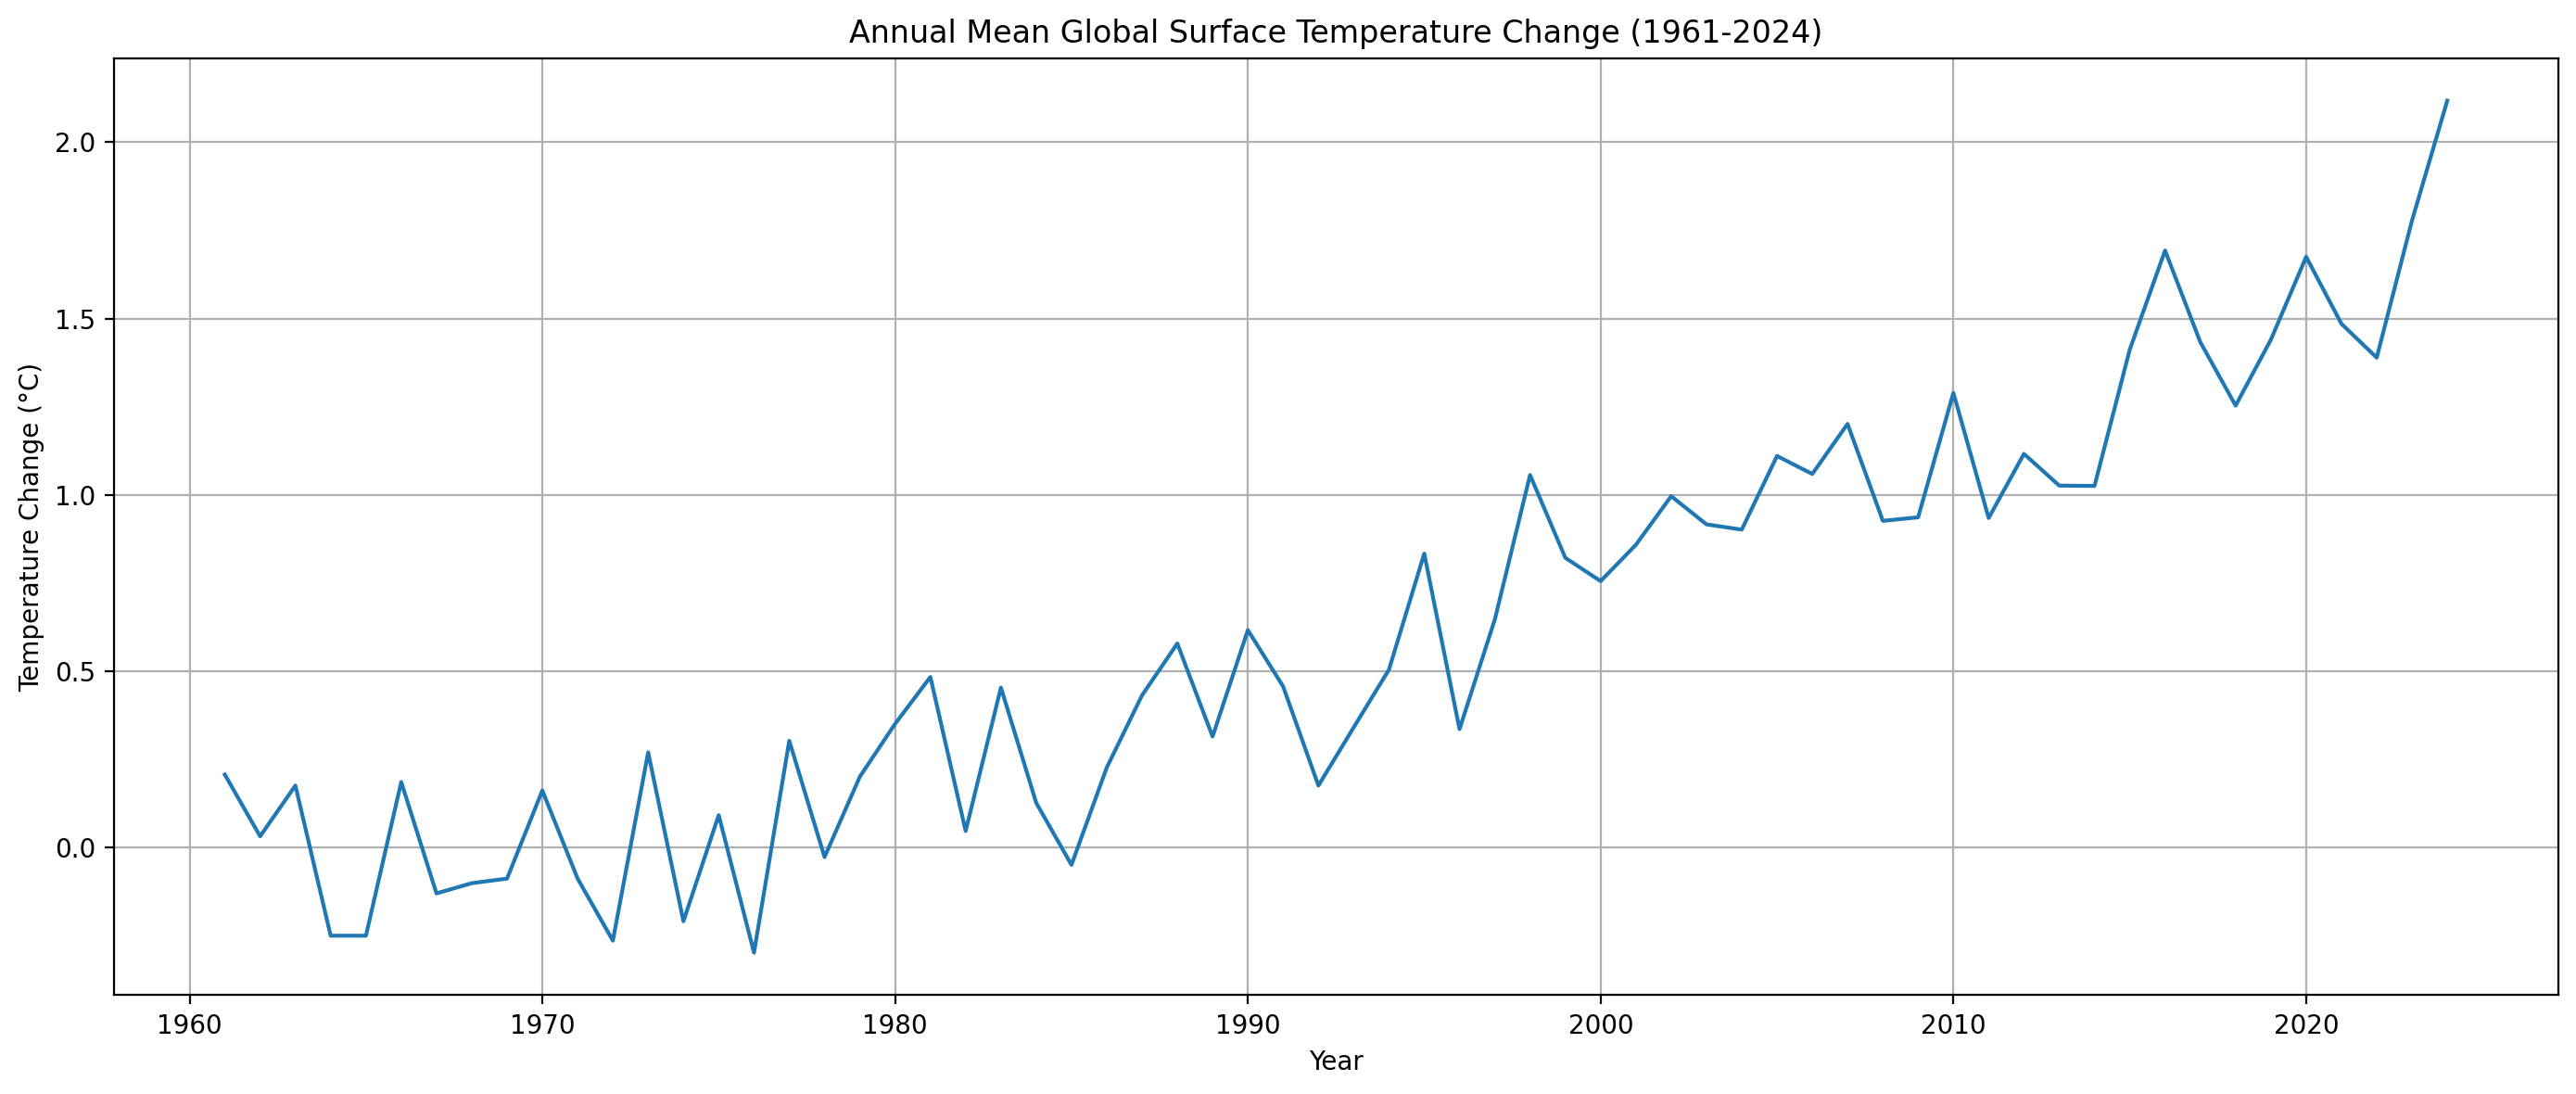

In [170]:
plt.figure(figsize=(14,6), dpi=200)
sns.lineplot(data=temp_long[temp_long['Country'] == 'World'], x='Year', y='Temperature_Change')
plt.title('Annual Mean Global Surface Temperature Change (1961-2024)')
plt.ylabel('Temperature Change (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('Global_Average_Temperature_Change_Over_Time.png', dpi=200, bbox_inches='tight')
plt.show()


##### 2. Sea Level Changes Across Indian Ocean  
Visualizes sea level changes over time in Indian Ocean Region to see differences in sea level rise or fall.

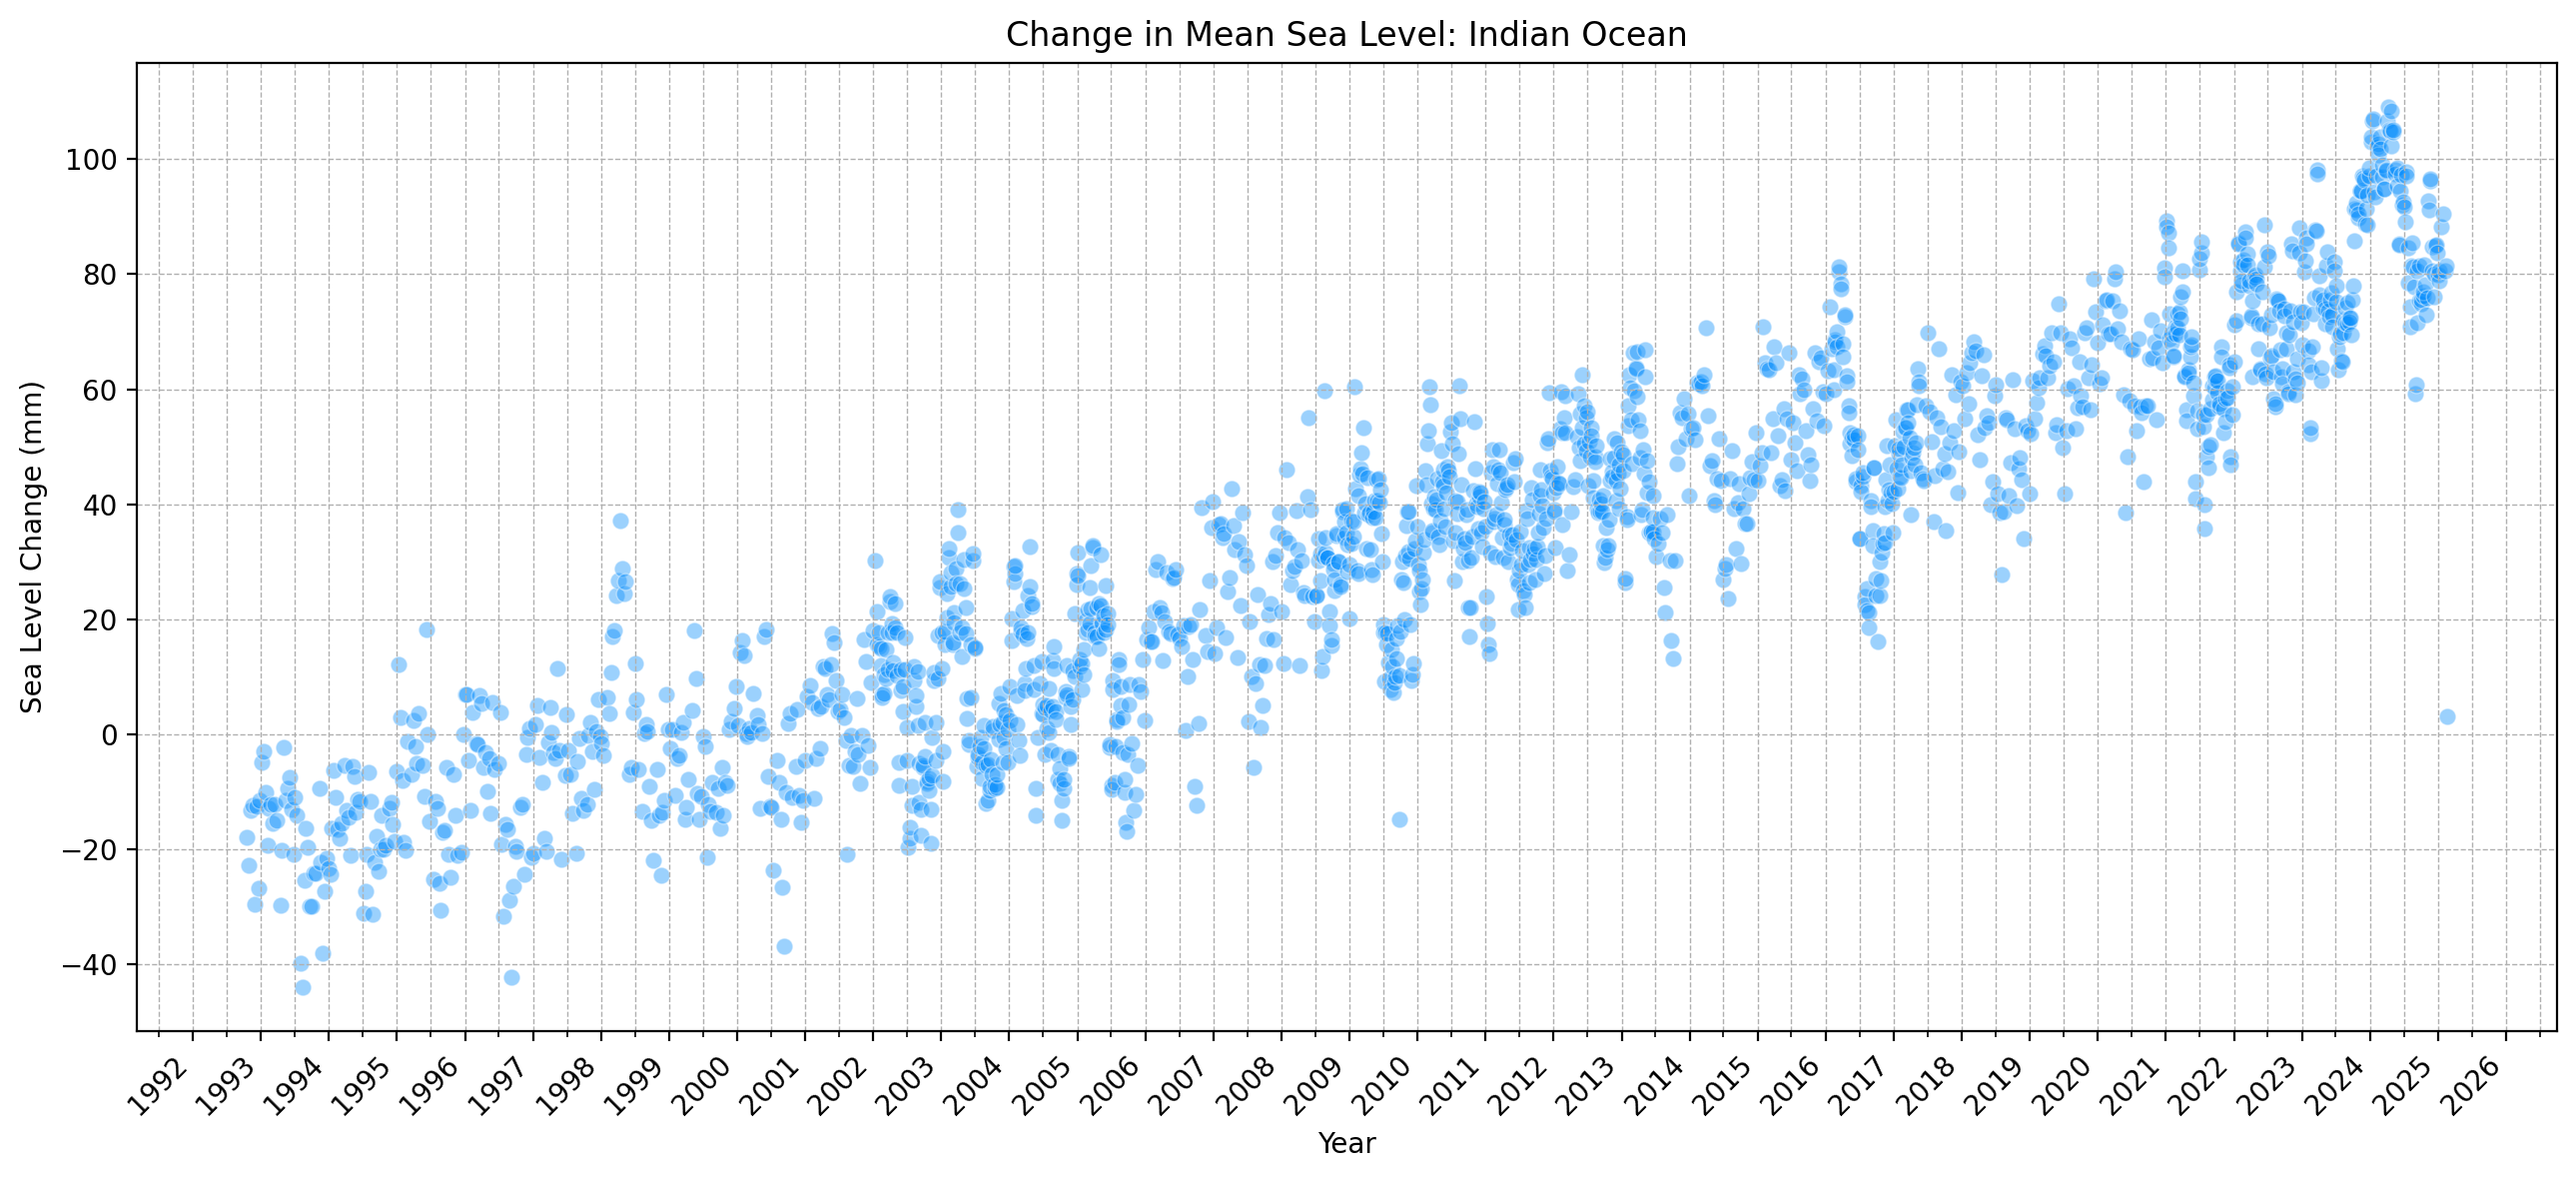

In [169]:
plt.figure(figsize=(13,6), dpi=200)
sns.scatterplot(data=indian_ocean_data, x='Date', y='Value', color='#058DFC', alpha=0.4)

# Get the current Axes object to customize its properties
ax = plt.gca()

# Major ticks on the x-axis to correspond to each year
ax.xaxis.set_major_locator(mdates.YearLocator())

# Format the major ticks on the x-axis to display the year as four digits (e.g., 2023)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set minor ticks on the x-axis at January and July of each year for finer granularity
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1,7)))

# Rotate the major tick labels on the x-axis by 45 degrees and align them to the right for readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax.set_title('Change in Mean Sea Level: Indian Ocean')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level Change (mm)')
ax.grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('Sea_Level_Changes_Across_Indian_Ocean.png', dpi=200, bbox_inches='tight')
plt.show()

##### 3. Frequency of Total Climate-Related Disasters Over Time (Global)  
Shows trend of total climate-related disasters globally, illustrating how the frequency has evolved over time.

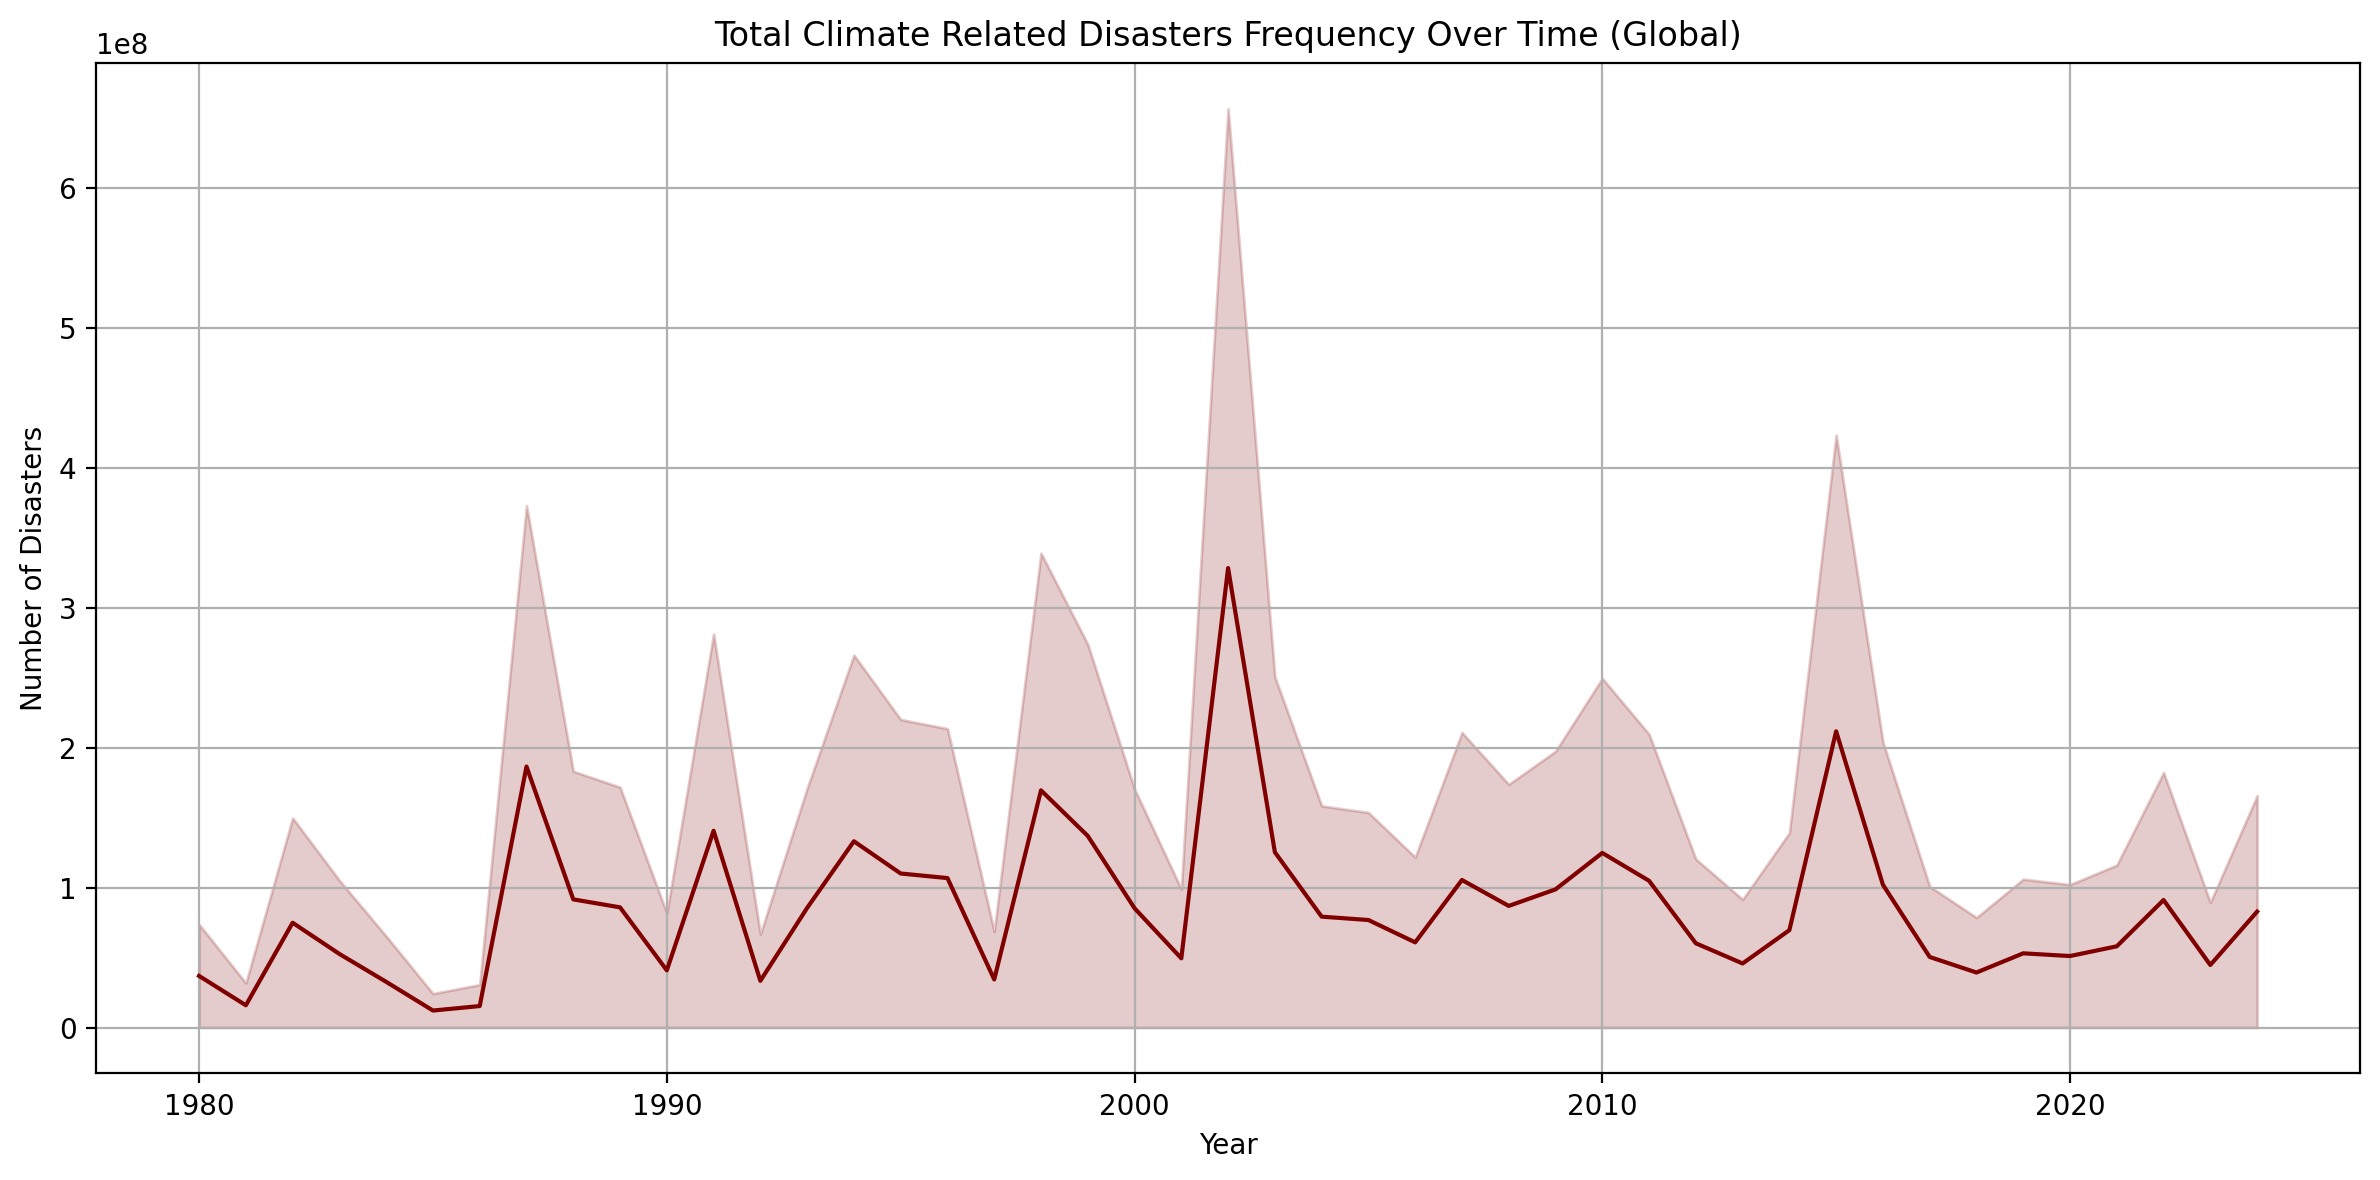

In [171]:
total_disasters = disasters_summary[disasters_summary['Indicator'].str.contains('TOTAL')]
plt.figure(figsize=(12,6), dpi=200)
sns.lineplot(data=total_disasters, x='Year', y='Value', color='maroon')
plt.title('Total Climate Related Disasters Frequency Over Time (Global)')
plt.ylabel('Number of Disasters')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('Frequency_of_Total_Climate-Related_Disasters.png', dpi=200, bbox_inches='tight')
plt.show()


##### 4. Forest Area Change Over Years for a Country (e.g., India)
This chart shows the change in forest area for India over three decades, highlighting deforestation or reforestation trends.

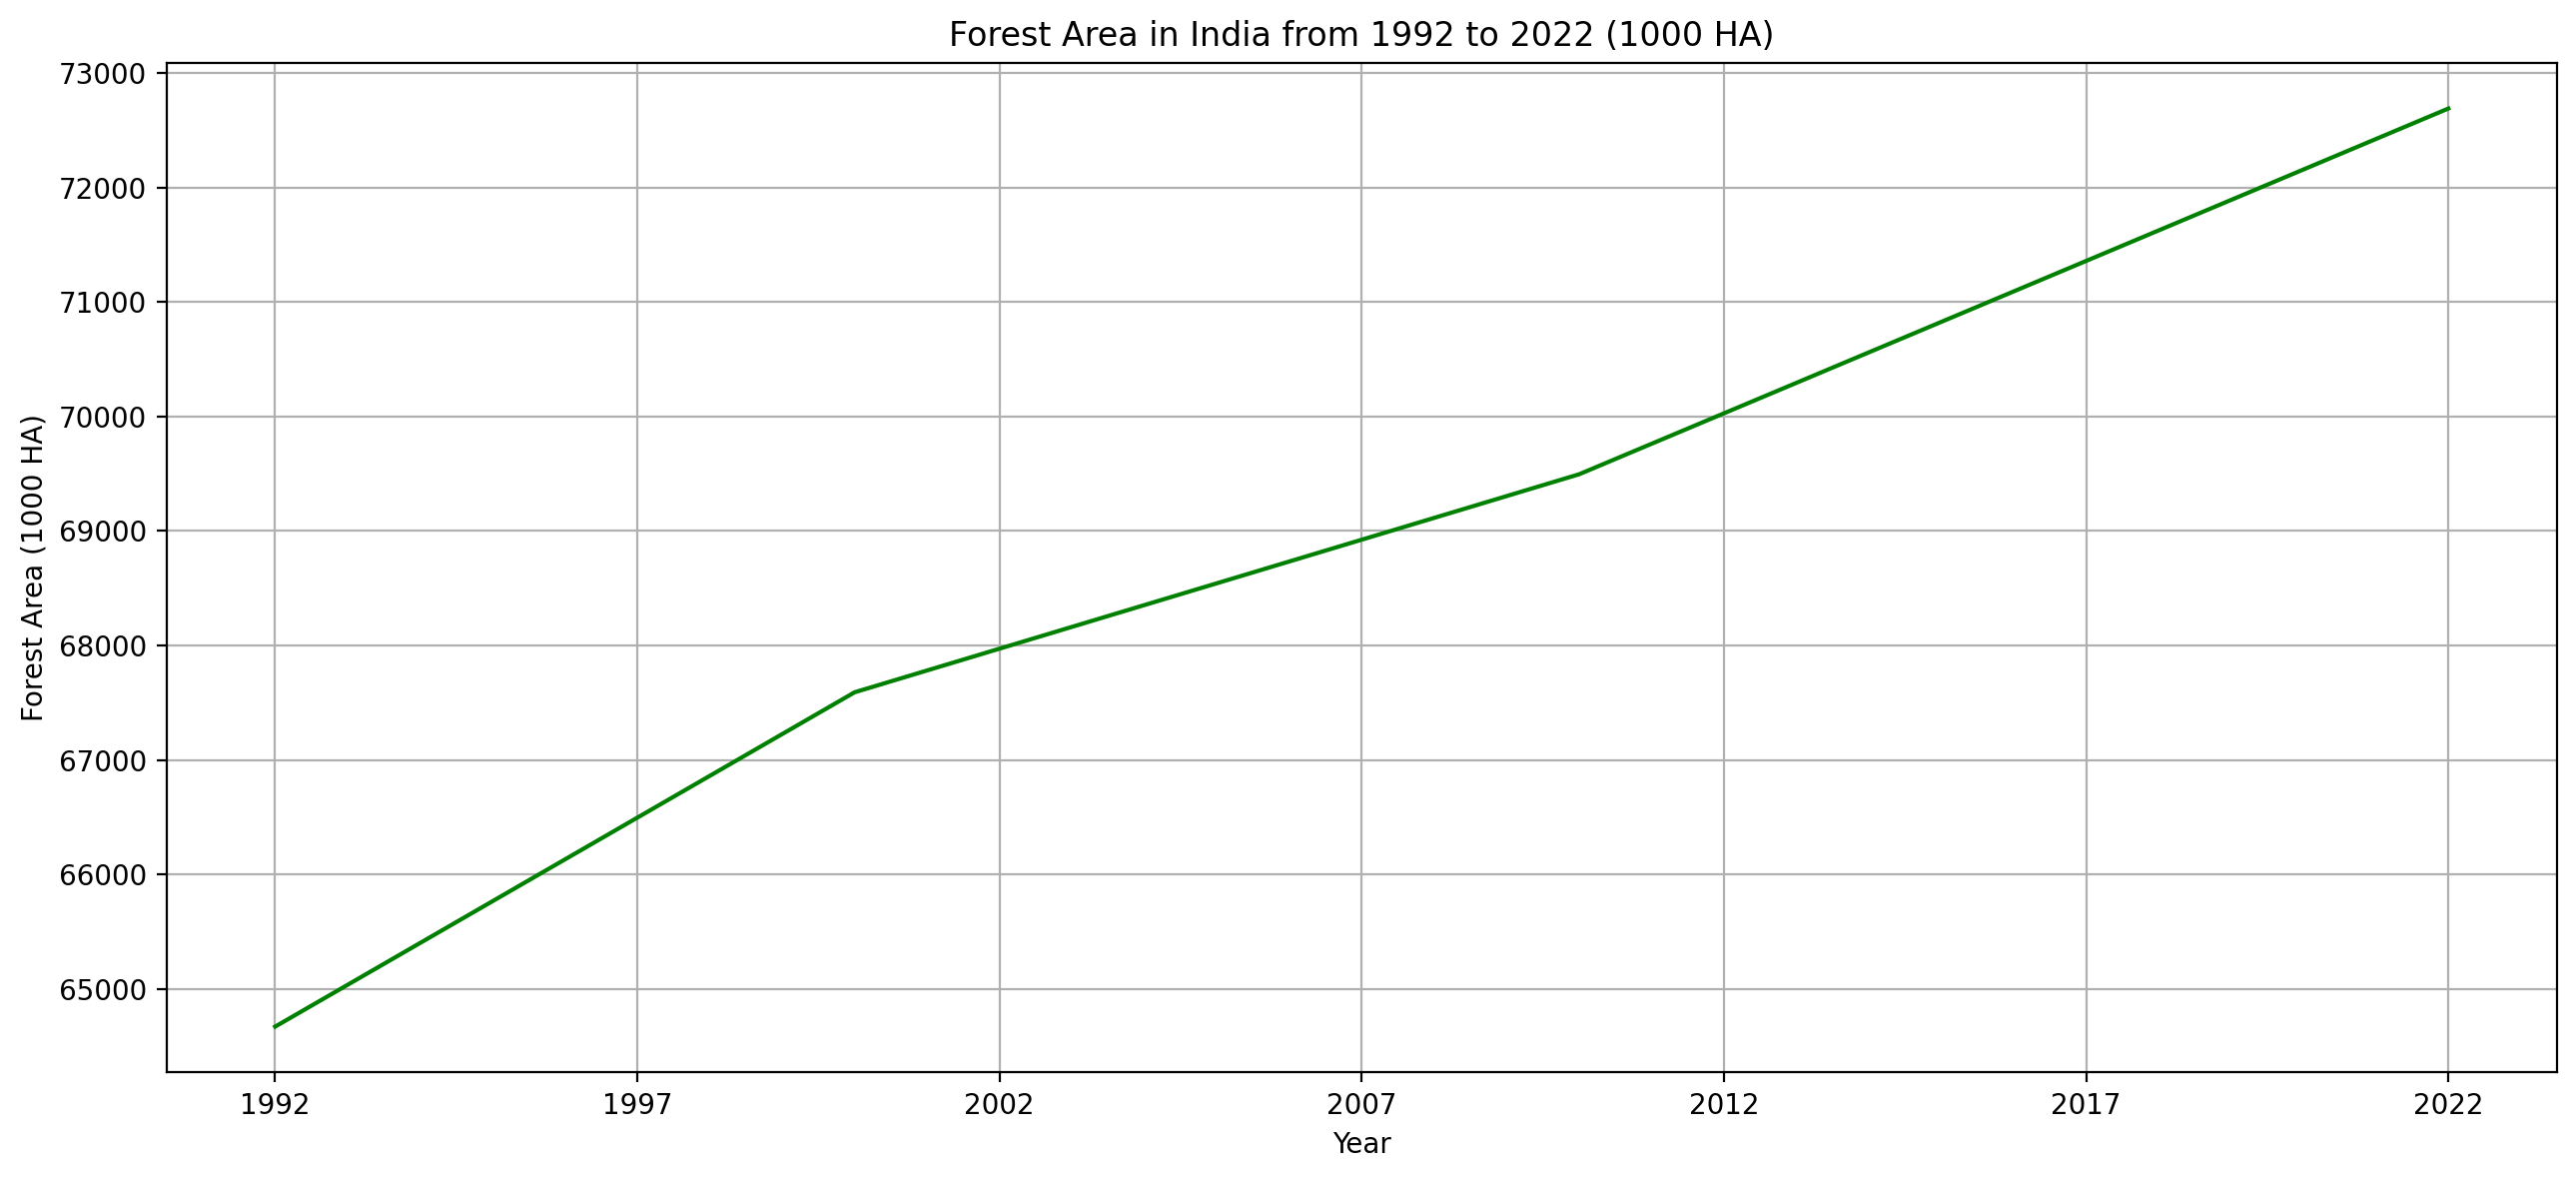

In [172]:
forest_India = forest_long[(forest_long['Country']=='India') & (forest_long['Indicator']=='Forest area')]

plt.figure(figsize=(13,6), dpi = 200)
sns.lineplot(data=forest_India, x='Year', y='Value', color='green')
plt.title('Forest Area in India from 1992 to 2022 (1000 HA)')
plt.ylabel('Forest Area (1000 HA)')
plt.xlabel('Year')
plt.grid(True)

# Set x-axis ticks at 5-year intervals
start_year = forest_India['Year'].min()
end_year = forest_India['Year'].max()
plt.xticks(np.arange(start_year, end_year + 1, 5))
plt.tight_layout()
plt.savefig('Forest_Area_Change.png', dpi=200, bbox_inches='tight')
plt.show()

##### 5. Land Cover Index Change Over Time (World)
Visualizes how climate-altering land cover has changed globally, impacting climate systems.

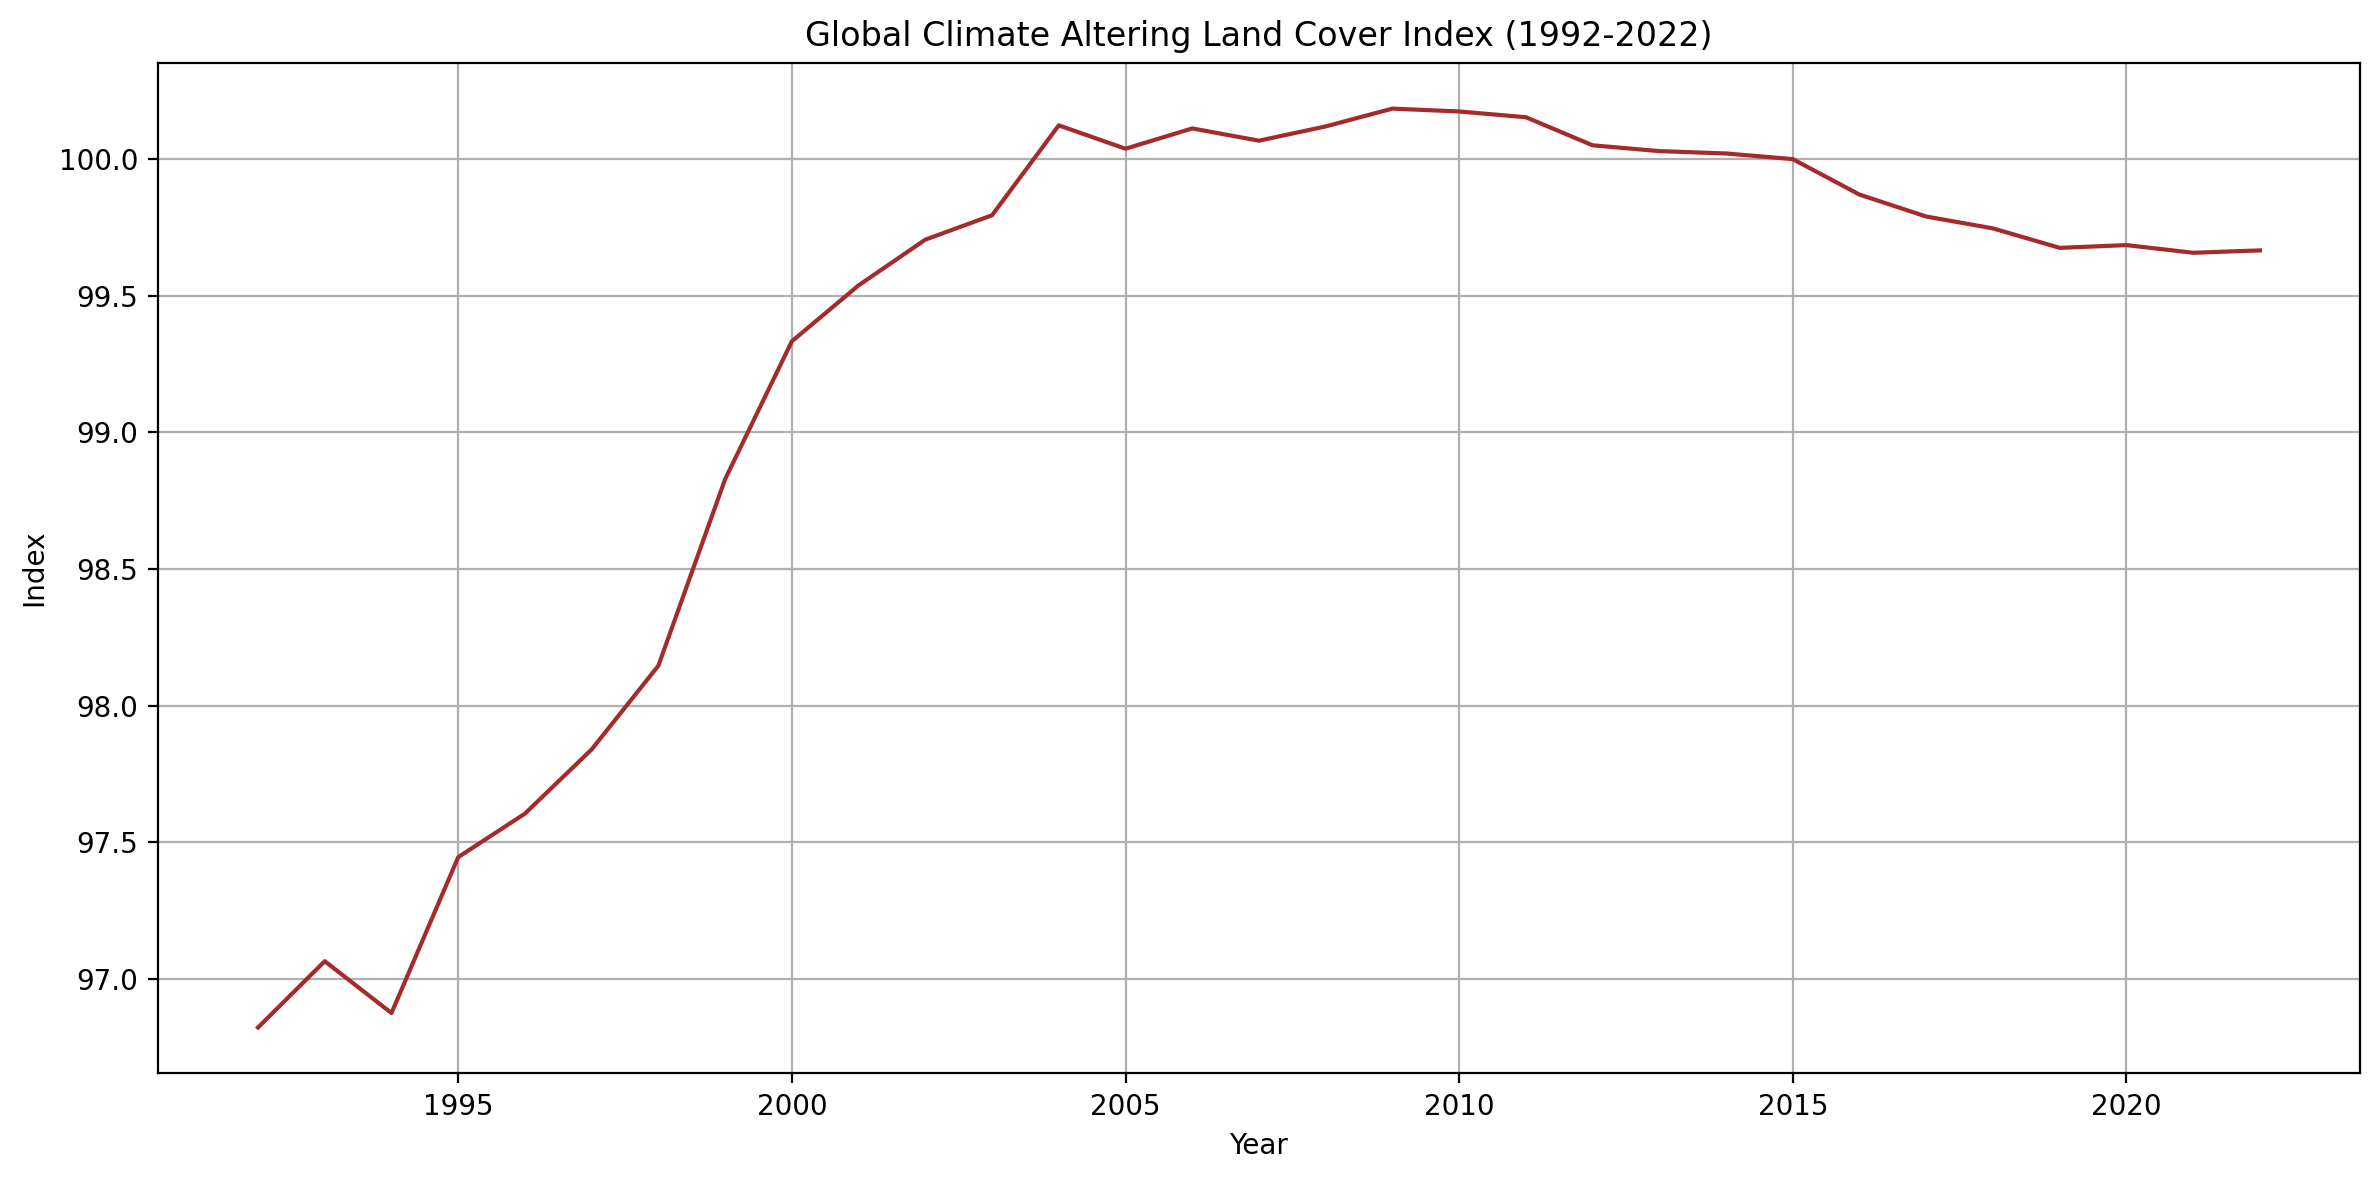

In [173]:
land_cover_world = land_cover_long[(land_cover_long['Country']=='World') & 
                                  (land_cover_long['Indicator']=='Climate Altering Land Cover Index')]

plt.figure(figsize=(12,6), dpi = 200)
sns.lineplot(data=land_cover_world, x='Year', y='Value', color='Brown')
plt.title('Global Climate Altering Land Cover Index (1992-2022)')
plt.xlabel('Year')
plt.ylabel('Index')
plt.grid(True)
plt.tight_layout()
plt.savefig('Land_Cover_Index.png', dpi=200, bbox_inches='tight')
plt.show()

##### 6. Monthly Atmospheric CO2 Concentrations Over Time
This line graph presents the trend of atmospheric CO2 concentrations from 1958 onward, showing continued increase contributing to climate change.

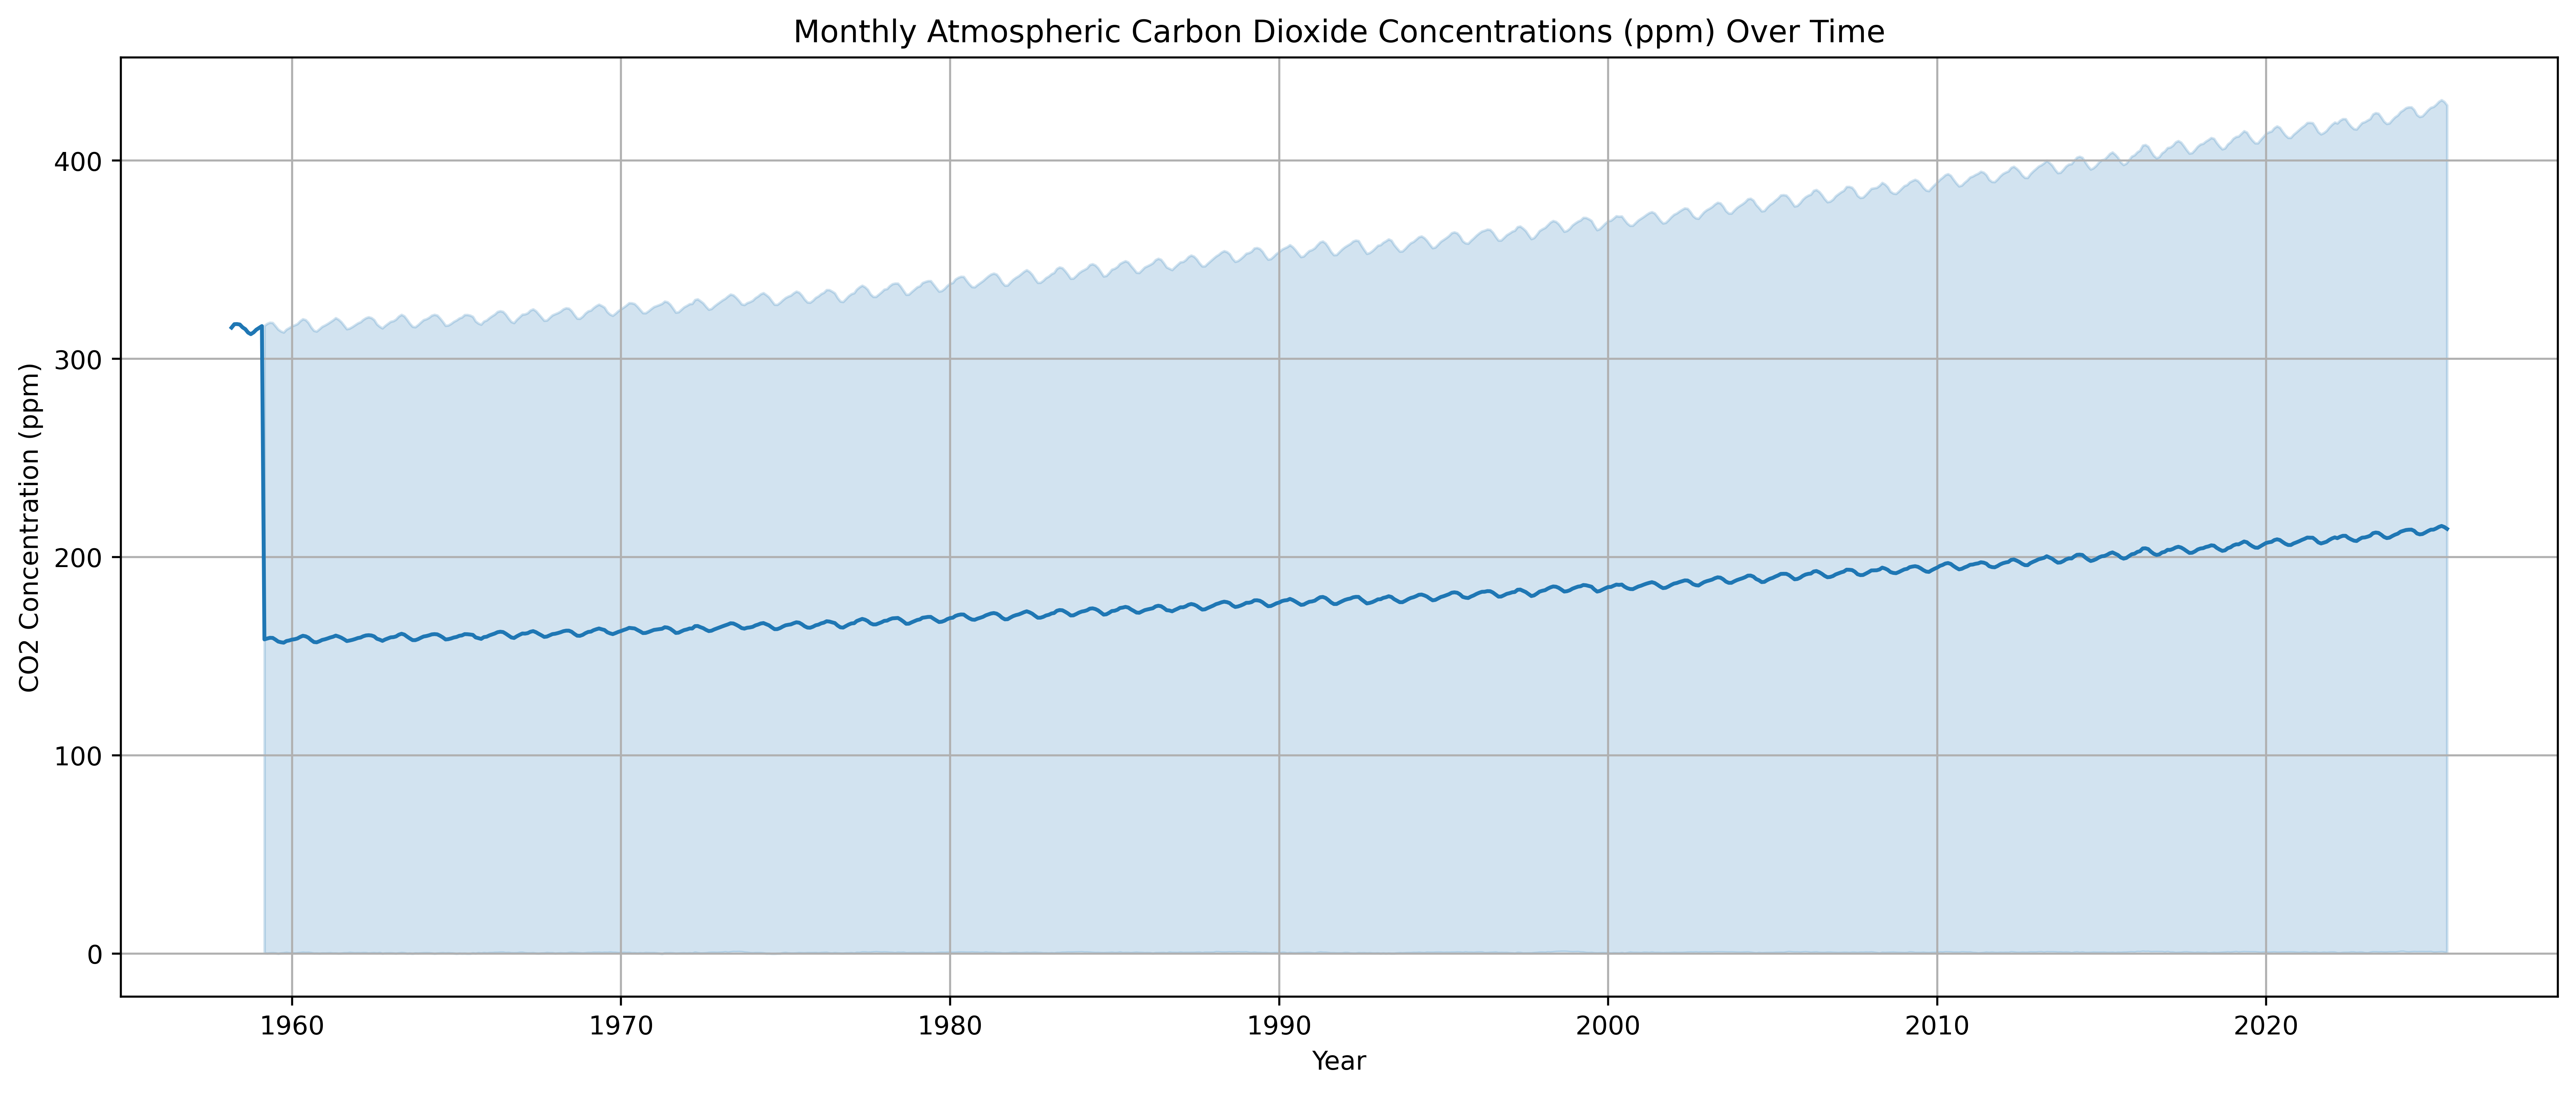

In [174]:
plt.figure(figsize=(14,6), dpi=500)
sns.lineplot(data=co2_long, x='Date', y='Value')
plt.title('Monthly Atmospheric Carbon Dioxide Concentrations (ppm) Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Monthly_Atmospheric_CO2.png', dpi=200, bbox_inches='tight')
plt.show()

---
#### Key Conclusions

1. **Global Temperature Rise:** There is a consistent upward trend in global surface temperatures since the mid-20th century, confirming the ongoing global warming phenomenon and regional disparities in warming rates.
2. **Sea Level Rise:** Satellite data confirm that sea levels have been rising over recent decades, posing increased risks to coastal communities and ecosystems globally.
3. **Increasing Climate Disasters:** Frequency and severity of climate-related disasters have generally increased, correlating with temperature rises and exacerbating social and economic vulnerabilities.
4. **Forest Carbon Dynamics:** Changes in forest areas and carbon stocks reveal both loss and gain patterns; overall forest carbon plays an essential role in mitigating climate change but is threatened by deforestation and land use changes.
5. **Land Cover and Climate Forcing:** Land cover changes driven by human activity continue to influence climate by modifying surface properties and carbon fluxes, necessitating integrated land management policies.
6. **Rising Atmospheric CO2:** Persistent increases in atmospheric CO2 concentrations emphasize the importance of reducing emissions and enhancing carbon sequestration efforts.

This initiative highlights the urgent requirement for unified international efforts on climate change reduction, adaptation, and sustainable land administration to avert additional ecological damage and protect human and ecosystem health. The results enhance the comprehension of current climate patterns and act as a basis for scientific and policy efforts.  

---

### Dashboard  

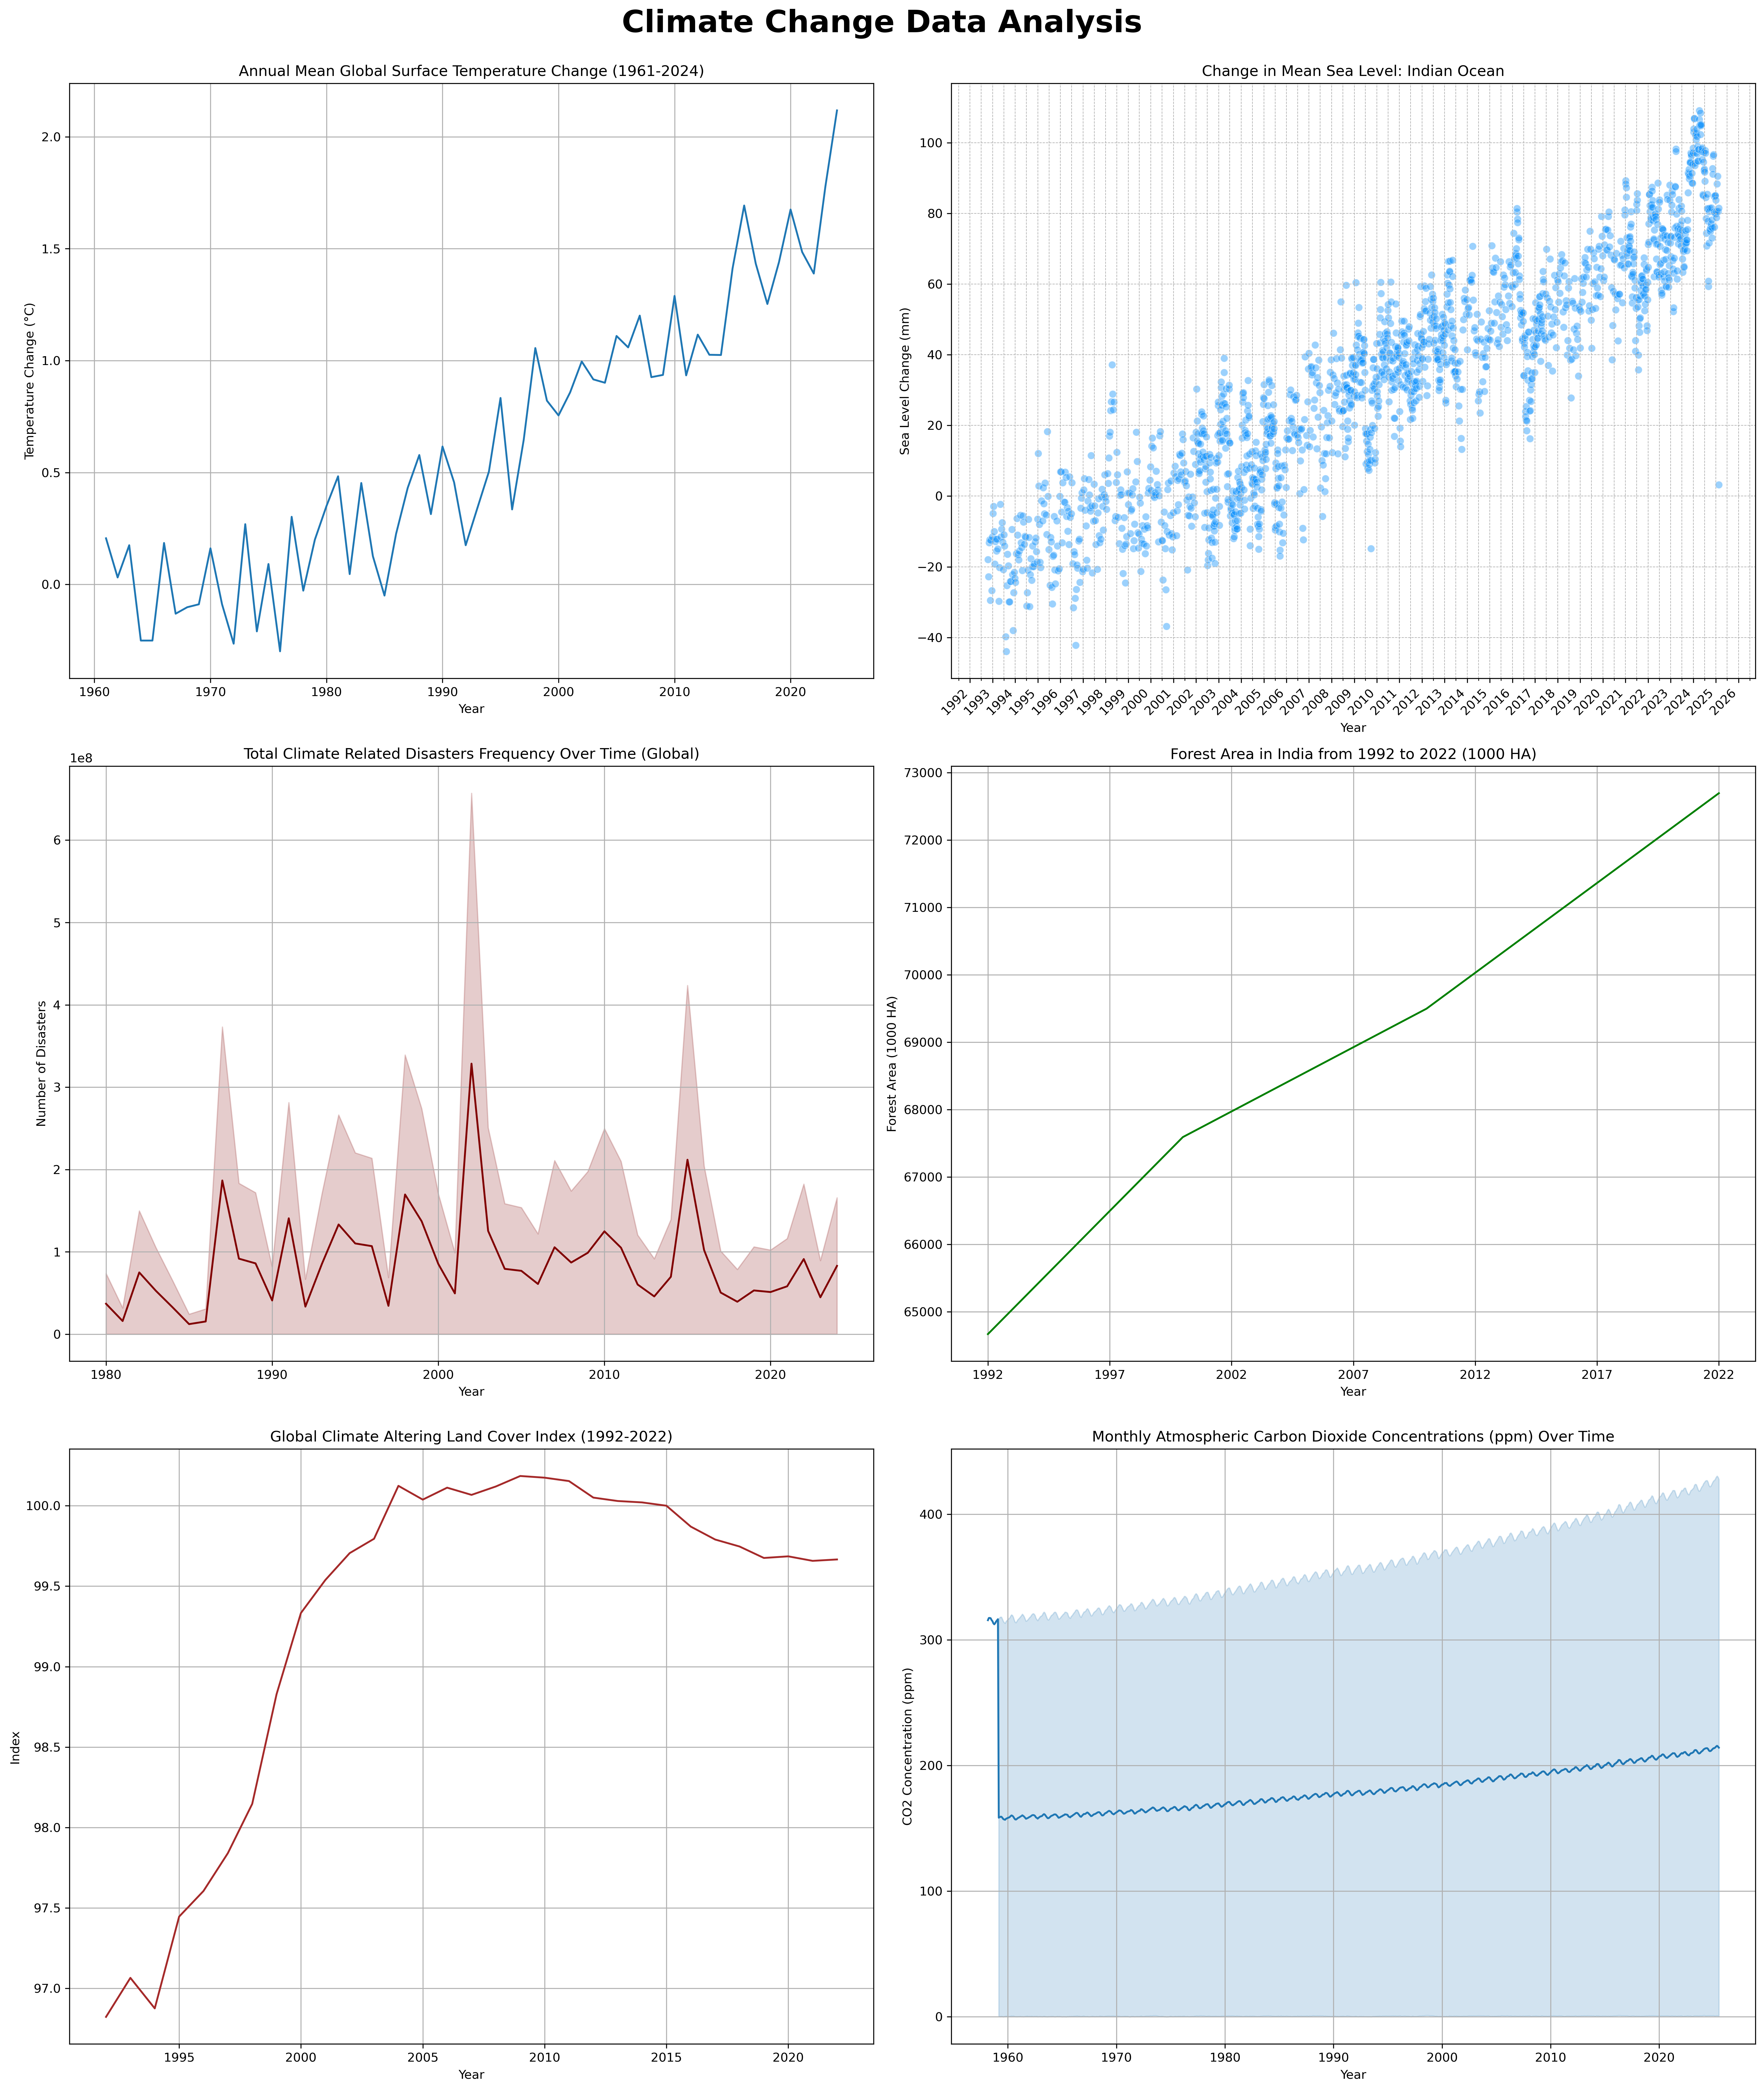

In [175]:
# Create subplots: 4 rows, 2 columns
fig, axes = plt.subplots(3, 2, figsize=(20, 24), dpi=300)
axes = axes.flatten()

# 1. Global Average Temperature Change Over Time)
sns.lineplot(data=temp_long[temp_long['Country'] == 'World'], x='Year', y='Temperature_Change', ax=axes[0])
axes[0].set_title('Annual Mean Global Surface Temperature Change (1961-2024)')
axes[0].set_ylabel('Temperature Change (°C)')
axes[0].set_xlabel('Year')
axes[0].grid(True)

# 2. Sea Level Changes Across Different Oceans
sns.scatterplot(data=indian_ocean_data, x='Date', y='Value', color='#058DFC', alpha=0.4, ax=axes[1])
axes[1].xaxis.set_major_locator(mdates.YearLocator())
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1].xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[1].set_title('Change in Mean Sea Level: Indian Ocean')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sea Level Change (mm)')
axes[1].grid(which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# 3. Frequency of Total Climate-Related Disasters Over Time (Global)
sns.lineplot(data=total_disasters, x='Year', y='Value', color='maroon', ax=axes[2])
axes[2].set_title('Total Climate Related Disasters Frequency Over Time (Global)')
axes[2].set_ylabel('Number of Disasters')
axes[2].set_xlabel('Year')
axes[2].grid(True)

# 4. Forest Area Change Over Years for a Country (e.g., India)
sns.lineplot(data=forest_India, x='Year', y='Value', color='green', ax=axes[3])
axes[3].set_title('Forest Area in India from 1992 to 2022 (1000 HA)')
axes[3].set_ylabel('Forest Area (1000 HA)')
axes[3].set_xlabel('Year')
axes[3].grid(True)
axes[3].set_xticks(np.arange(start_year, end_year + 1, 5))
plt.tight_layout()

# 5. Land Cover Index Change Over Time (World)
sns.lineplot(data=land_cover_world, x='Year', y='Value', color='Brown', ax=axes[4])
axes[4].set_title('Global Climate Altering Land Cover Index (1992-2022)')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Index')
axes[4].grid(True)

# 6. Monthly Atmospheric CO2 Concentrations Over Time
sns.lineplot(data=co2_long, x='Date', y='Value', ax=axes[5])
axes[5].set_title('Monthly Atmospheric Carbon Dioxide Concentrations (ppm) Over Time')
axes[5].set_xlabel('Year')
axes[5].set_ylabel('CO2 Concentration (ppm)')
axes[5].grid(True)

#Title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Climate Change Data Analysis', fontsize=25, fontweight='bold')
plt.savefig('Climate_Change_Dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

---
<center>
    <h1>
  Thank You !
        </h1>
    </center>